In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Process

In [4]:
Kp = 2.0
Tau = 150.0
Zeta = 0.5
Delay = 200

In [5]:
A = Tau**2
B = 2*Zeta*Tau
C = 1
sys = Kp/(A*s**2 + B*s + 1)

## Second Order Pade Approximation / Dead Time

In [6]:
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([5.e-05]), array([1.e+00, 1.e-02, 5.e-05]))

## SOPDT

In [7]:
SOPDT = control.series(Pade, sys)
SOPDT

TransferFunction(array([0.0001]), array([2.250e+04, 3.750e+02, 3.625e+00, 1.750e-02, 5.000e-05]))

In [8]:
# Simulate step response
t, y = control.step_response(SOPDT, T=2500, T_num=2501)

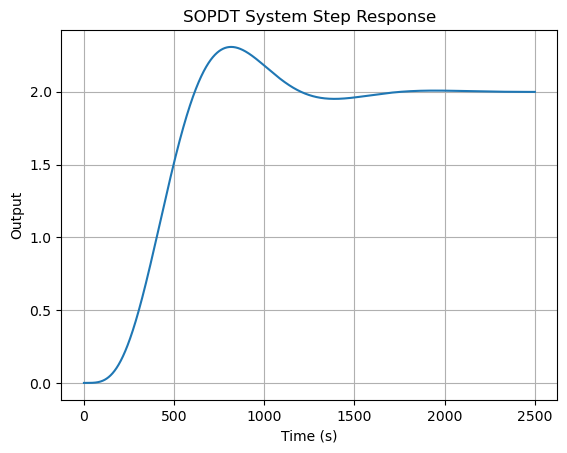

In [9]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('SOPDT System Step Response')
plt.grid()
plt.show()

## Export Data

In [10]:
import pandas as pd
import numpy as np

In [11]:
t = np.transpose(t)
y = np.transpose(y)

In [12]:
df = pd.DataFrame({'t':t, 'y':y})

In [13]:
df.to_excel("SOPDT.xlsx", index=False)  